# **ARTIFICIAL NEURAL NETWORKS**

In [4]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [5]:
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [10]:
print("Number of samples:", len(df))
print("Number of features:", len(df.columns) - 1)  # Excluding the target column
print("Classes:", df['letter'].unique())

Number of samples: 20000
Number of features: 16
Classes: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


In [11]:
print(df.groupby('letter').size())

letter
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64


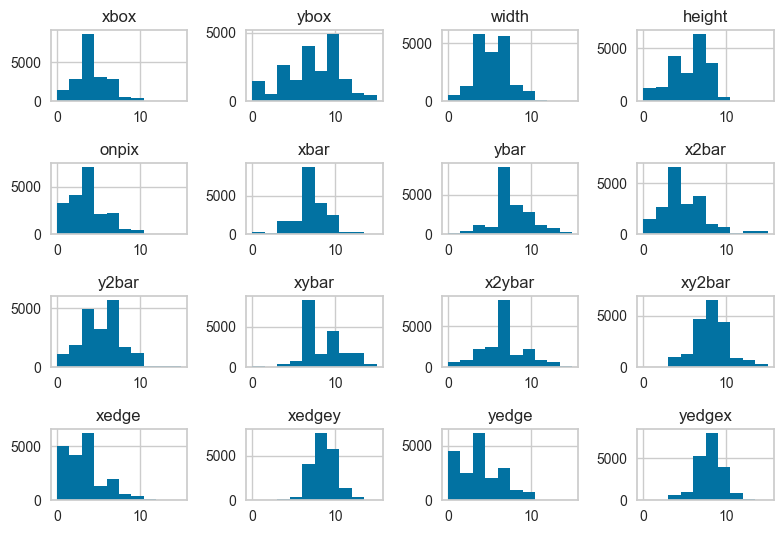

In [12]:
df.hist()
plt.tight_layout()

In [14]:
array = df.values

In [15]:
X = array[:, 1:17]
Y = array[:, 0]

In [16]:
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)

X matrix dimensionality: (20000, 16)
Y vector dimensionality: (20000,)


In [17]:
# split the data into a training set and a test set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                                random_state=10, stratify=Y)

In [18]:
print("X_train: ", X_train.shape)
print("X_validation: ", X_validation.shape)
print("Y_train: ", Y_train.shape)
print("Y_validation: ", Y_validation.shape)

X_train:  (16000, 16)
X_validation:  (4000, 16)
Y_train:  (16000,)
Y_validation:  (4000,)


In [19]:
DT = DecisionTreeClassifier()

In [20]:
cm = ConfusionMatrix(DT, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


0.87425

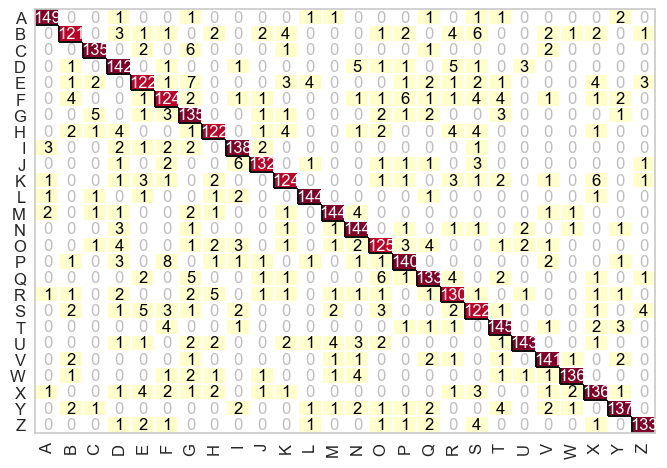

In [21]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [22]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [23]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.87425


In [24]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[149   0   0   1   0   0   1   0   0   0   0   1   1   0   0   0   1   0
    1   1   0   0   0   0   2   0]
 [  0 121   0   3   1   1   0   2   0   2   4   0   0   0   1   2   0   4
    6   0   0   2   1   2   0   1]
 [  0   0 135   0   2   0   6   0   0   0   1   0   0   0   0   0   1   0
    0   0   0   2   0   0   0   0]
 [  0   1   0 142   0   1   0   0   1   0   0   0   0   5   1   1   0   5
    1   0   3   0   0   0   0   0]
 [  0   1   2   0 122   1   7   0   0   0   3   4   0   0   0   1   2   1
    2   1   0   0   0   4   0   3]
 [  0   4   0   0   1 124   2   0   1   1   0   0   0   1   1   6   1   1
    4   4   0   1   0   1   2   0]
 [  0   0   5   0   1   3 135   0   0   1   1   0   0   0   2   1   2   0
    0   3   0   0   0   0   1   0]
 [  0   2   1   4   0   0   1 122   0   1   4   0   0   1   2   0   0   4
    4   0   0   0   0   1   0   0]
 [  3   0   0   2   1   2   2   0 138   2   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   0   0   1  

In [25]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.94304   0.94304   0.94304       158
           B    0.87681   0.79085   0.83162       153
           C    0.91837   0.91837   0.91837       147
           D    0.83041   0.88199   0.85542       161
           E    0.83562   0.79221   0.81333       154
           F    0.80519   0.80000   0.80259       155
           G    0.78488   0.87097   0.82569       155
           H    0.86525   0.82993   0.84722       147
           I    0.87898   0.91391   0.89610       151
           J    0.91667   0.88591   0.90102       149
           K    0.85517   0.83784   0.84642       148
           L    0.93506   0.94737   0.94118       152
           M    0.91720   0.91139   0.91429       158
           N    0.85207   0.91720   0.88344       157
           O    0.83893   0.82781   0.83333       151
           P    0.86957   0.86957   0.86957       161
           Q    0.86364   0.84713   0.85531       157
           R    0.82278   0

In [26]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [27]:
from sklearn.naive_bayes import GaussianNB

# **GaussianNB**

In [28]:
gaussianNB = GaussianNB()

In [29]:
cm = ConfusionMatrix(gaussianNB, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.64175

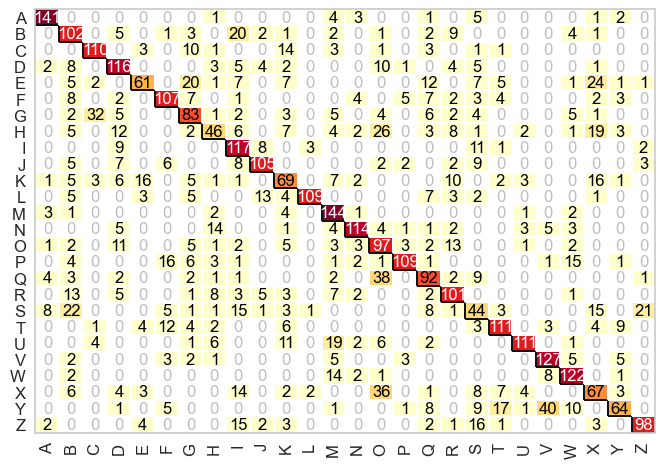

In [30]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [31]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [32]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.64175


In [33]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[141   0   0   0   0   0   0   1   0   0   0   0   4   3   0   0   1   0
    5   0   0   0   0   1   2   0]
 [  0 102   0   5   0   1   3   0  20   2   1   0   2   0   1   0   2   9
    0   0   0   0   4   1   0   0]
 [  0   0 110   0   3   0  10   1   0   0  14   0   3   0   1   0   3   0
    1   1   0   0   0   0   0   0]
 [  2   8   0 116   0   0   0   3   5   4   2   0   0   0  10   1   0   4
    5   0   0   0   0   1   0   0]
 [  0   5   2   0  61   0  20   1   7   0   7   0   0   0   0   0  12   0
    7   5   0   0   1  24   1   1]
 [  0   8   0   2   0 107   7   0   1   0   0   0   0   4   0   5   7   2
    3   4   0   0   0   2   3   0]
 [  0   2  32   5   0   0  83   1   2   0   3   0   5   0   4   0   6   2
    4   0   0   0   5   1   0   0]
 [  0   5   0  12   0   0   2  46   6   0   7   0   4   2  26   0   3   8
    1   0   2   0   1  19   3   0]
 [  0   0   0   9   0   0   0   0 117   8   0   3   0   0   0   0   0   0
   11   1   0   0   0   0   0   2]
 [  0   5   0   7  

In [34]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.87037   0.89241   0.88125       158
           B    0.51000   0.66667   0.57790       153
           C    0.72368   0.74830   0.73579       147
           D    0.61053   0.72050   0.66097       161
           E    0.64894   0.39610   0.49194       154
           F    0.69032   0.69032   0.69032       155
           G    0.52866   0.53548   0.53205       155
           H    0.49462   0.31293   0.38333       147
           I    0.53670   0.77483   0.63415       151
           J    0.75000   0.70470   0.72664       149
           K    0.47586   0.46622   0.47099       148
           L    0.94783   0.71711   0.81648       152
           M    0.64000   0.91139   0.75196       158
           N    0.83212   0.72611   0.77551       157
           O    0.42731   0.64238   0.51323       151
           P    0.87200   0.67702   0.76224       161
           Q    0.57500   0.58599   0.58044       157
           R    0.63125   0

In [35]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# **KNN Classifier**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)

In [38]:
cm = ConfusionMatrix(knn, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.966

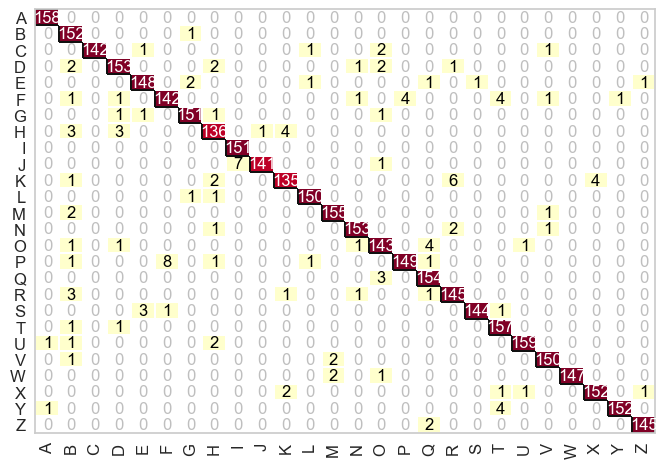

In [39]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [40]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [41]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.966


In [42]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 152   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 142   0   1   0   0   0   0   0   0   1   0   0   2   0   0   0
    0   0   0   1   0   0   0   0]
 [  0   2   0 153   0   0   0   2   0   0   0   0   0   1   2   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 148   0   2   0   0   0   0   1   0   0   0   0   1   0
    1   0   0   0   0   0   0   1]
 [  0   1   0   1   0 142   0   0   0   0   0   0   0   1   0   4   0   0
    0   4   0   1   0   0   1   0]
 [  0   0   0   1   1   0 151   1   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   0   3   0   0   0 136   0   1   4   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [43]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.98750   1.00000   0.99371       158
           B    0.89941   0.99346   0.94410       153
           C    1.00000   0.96599   0.98270       147
           D    0.95625   0.95031   0.95327       161
           E    0.96732   0.96104   0.96417       154
           F    0.94040   0.91613   0.92810       155
           G    0.97419   0.97419   0.97419       155
           H    0.93151   0.92517   0.92833       147
           I    0.95570   1.00000   0.97735       151
           J    0.99296   0.94631   0.96907       149
           K    0.95070   0.91216   0.93103       148
           L    0.98039   0.98684   0.98361       152
           M    0.97484   0.98101   0.97792       158
           N    0.97452   0.97452   0.97452       157
           O    0.93464   0.94702   0.94079       151
           P    0.97386   0.92547   0.94904       161
           Q    0.94479   0.98089   0.96250       157
           R    0.94156   0

In [44]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# **SVC**

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC(kernel='rbf', gamma='auto', C=6)

In [47]:
cm = ConfusionMatrix(svc, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.978

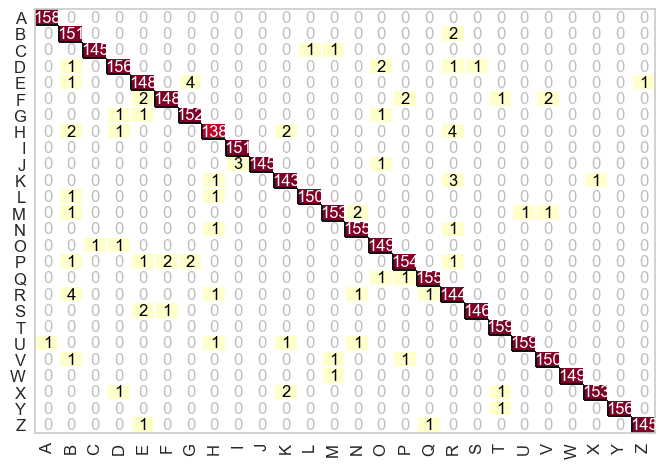

In [48]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [49]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [50]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.978


In [51]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 151   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 156   0   0   0   0   0   0   0   0   0   0   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   1   0   0 148   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   2 148   0   0   0   0   0   0   0   0   0   2   0   0
    0   1   0   2   0   0   0   0]
 [  0   0   0   1   1   0 152   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   1   0   0   0 138   0   0   2   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [52]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.99371   1.00000   0.99685       158
           B    0.92638   0.98693   0.95570       153
           C    0.99315   0.98639   0.98976       147
           D    0.97500   0.96894   0.97196       161
           E    0.95484   0.96104   0.95793       154
           F    0.98013   0.95484   0.96732       155
           G    0.96203   0.98065   0.97125       155
           H    0.96503   0.93878   0.95172       147
           I    0.98052   1.00000   0.99016       151
           J    1.00000   0.97315   0.98639       149
           K    0.96622   0.96622   0.96622       148
           L    0.99338   0.98684   0.99010       152
           M    0.98077   0.96835   0.97452       158
           N    0.97484   0.98726   0.98101       157
           O    0.96753   0.98675   0.97705       151
           P    0.97468   0.95652   0.96552       161
           Q    0.98726   0.98726   0.98726       157
           R    0.92308   0

In [53]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# **ANN**

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')

In [58]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.97025

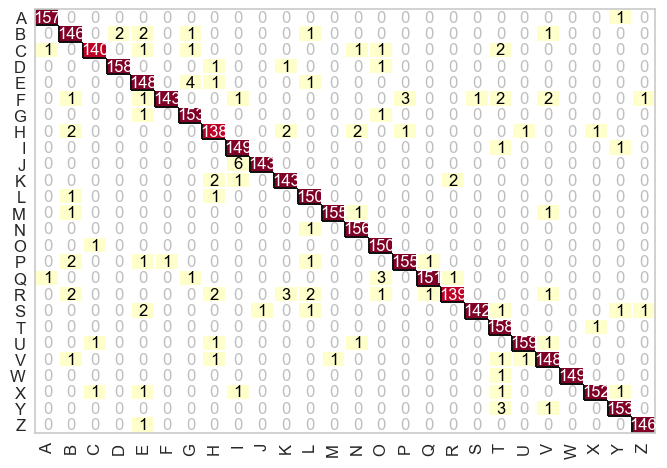

In [59]:
# train the model using the training sets
cm.fit(X_train, Y_train)
cm.score(X_validation, Y_validation)

In [60]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.978


In [61]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 151   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 156   0   0   0   0   0   0   0   0   0   0   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   1   0   0 148   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   2 148   0   0   0   0   0   0   0   0   0   2   0   0
    0   1   0   2   0   0   0   0]
 [  0   0   0   1   1   0 152   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   1   0   0   0 138   0   0   2   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [62]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.99371   1.00000   0.99685       158
           B    0.92638   0.98693   0.95570       153
           C    0.99315   0.98639   0.98976       147
           D    0.97500   0.96894   0.97196       161
           E    0.95484   0.96104   0.95793       154
           F    0.98013   0.95484   0.96732       155
           G    0.96203   0.98065   0.97125       155
           H    0.96503   0.93878   0.95172       147
           I    0.98052   1.00000   0.99016       151
           J    1.00000   0.97315   0.98639       149
           K    0.96622   0.96622   0.96622       148
           L    0.99338   0.98684   0.99010       152
           M    0.98077   0.96835   0.97452       158
           N    0.97484   0.98726   0.98101       157
           O    0.96753   0.98675   0.97705       151
           P    0.97468   0.95652   0.96552       161
           Q    0.98726   0.98726   0.98726       157
           R    0.92308   0

In [63]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>